## Import and loads

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os, sys
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from scipy.stats import linregress
from scipy.stats import spearmanr
from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.signal import butter, filtfilt, lfilter, welch, lfilter_zi, stft
import pandas as pd
from scipy.stats import spearmanr
from sklearn.model_selection import LeaveOneOut
import pickle
from time import time
from  scipy.spatial.distance import squareform
import matplotlib.colors as colors
import matplotlib.cm as cmx
import pickle

In [4]:
!pip install mne==0.19
import mne
!pip install git+https://github.com/UN-GCPDS/python-gcpds.utils.git
from gcpds.utils import loaddb

     |████████████████████████████████| 6.4MB 7.3MB/s 
  Cloning https://github.com/UN-GCPDS/python-gcpds.utils.git to /tmp/pip-req-build-k8h18_76
  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.utils.git /tmp/pip-req-build-k8h18_76
  Created wheel for gcpds-utils: filename=gcpds_utils-0.1a3-cp36-none-any.whl size=96944 sha256=30227c5b164f538c4233b0638dcc879816c873af509c331af56def331763d132
  Stored in directory: /tmp/pip-ephem-wheel-cache-18y_5biy/wheels/ab/4a/1e/d215a31a12c0fa202a9bccc9b9d68874deb08dfdce8b7d43c8
Successfully built gcpds-utils


In [5]:
from mne.io.pick import _picks_to_idx
from mne.viz.topomap import _check_outlines, _draw_outlines
from mne.viz import plot_topomap

In [6]:
FILEID = "1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O grafos_suxchaxfre.zip && rm -rf /tmp/cookies.txt
!dir
!unzip grafos_suxchaxfre.zip

--2021-01-24 15:59:42--  https://docs.google.com/uc?export=download&confirm=&id=1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV
Resolving docs.google.com (docs.google.com)... 74.125.199.113, 74.125.199.138, 74.125.199.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.199.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-1k-docs.googleusercontent.com/docs/securesc/u94qnl57oflc19jj42uj55iqeeahmvk9/19olt2m5rj5scmftu4ch5kdb457mnmab/1611503925000/17600740636788319470/09500238441832271539Z/1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV?e=download [following]
--2021-01-24 15:59:43--  https://doc-0c-1k-docs.googleusercontent.com/docs/securesc/u94qnl57oflc19jj42uj55iqeeahmvk9/19olt2m5rj5scmftu4ch5kdb457mnmab/1611503925000/17600740636788319470/09500238441832271539Z/1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV?e=download
Resolving doc-0c-1k-docs.googleusercontent.com (doc-0c-1k-docs.googleusercontent.com)... 142.250.99.132, 2607:f8b0:400e:c0c::84
Connecting to 

## Network definition

In [7]:
def get_weigths(model,bands):
    W = []
    for i in range(bands):
        w = np.sum(abs(mdl.get_layer('h1_'+str(i)).get_weights()[0]),axis=1)
        w = w-min(w)
        w/= max(w)
        W.append(w)
    return W

In [8]:
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
        
class SMRfeat(BaseEstimator, TransformerMixin):
  def __init__(self):
    self
      
  
  def scalerlist(self,Xfull):
     self.scaler = len(Xfull)*[None]
     for i in range(len(Xfull)):
        self.scaler[i] = StandardScaler()
        Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
     return Xfull


  def fit(self,Xepochs,*_):
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]


      
      self.scalerlist(Xfull)
      return 

  def transform(self,Xepochs,*_):   
      
          
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]

      
      for i in range(len(Xfull)):
         self.scaler[i] = StandardScaler()
         Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
      return Xfull

  def fit_transform(self,Xepochs,*_):
      self.fit(Xepochs)
      return self.transform(Xepochs)   
class MCSMRDNN_transfer(BaseEstimator, TransformerMixin):
  def __init__(self,epochs=200,batch_size=32,learning_rate=1e-3,optimizer='Adam',
                l1_param=1e-3,l2_param=1e-3,validation_split=0.2,verbose=0,fs=512,scalex=1,scaley=1,droprate=0.2,Mc_iter=100,alpha_dropout=True,plot_hst = False,
                path_in=None, path_out=None, run = None,initial_run=False):
        self.epochs = epochs
        self.scalex = scalex
        self.scaley = scaley
        self.batch_size = batch_size
        self.learning_rate=learning_rate 
        self.l1_param=l1_param 
        self.l2_param=l2_param
        self.validation_split = validation_split
        self.verbose = verbose
        self.optimizer = optimizer
        self.fs=fs
        self.droprate = droprate
        self.Mc_iter = Mc_iter
        self.alpha_dropout = alpha_dropout
        self.plot_hst = plot_hst
        self.path_in = path_in
        self.path_out = path_out
        self.run = run
        self.initial_run =initial_run
  
  def fit(self,X,y,*_):

    #entrenar predictor SMRDNN
    if self.optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
    elif self.optimizer == "SGD":
        opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
    else:
        opt=self.optimizer
    
    tf.keras.backend.clear_session()
    seed = 100
    np.random.seed(seed)
    tf.random.set_seed(seed)
    Q1f = 1.5
    Qff = 0.5
    l1 = self.l1_param
    l2 = self.l2_param
    act1 = 'tanh'
    actf = 'tanh'
    inputs = len(X)*[None]
    hiddens = len(X)*[None]
    drop_1 = len(X)*[None]
    winitializer = tf.keras.initializers.GlorotNormal(seed=seed)
    binitializer = "zeros"
    #h1
    for i in range(len(X)):
        inputs[i] = tf.keras.layers.Input(shape=(X[i].shape[1]), name='in_'+str(i))
        hiddens[i] = tf.keras.layers.Dense(int(X[i].shape[1]*Q1f),activation=act1,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),kernel_initializer=winitializer,bias_initializer=binitializer,name='h1_'+str(i))(inputs[i])
        if self.alpha_dropout:
            drop_1[i] = tf.keras.layers.AlphaDropout(self.droprate,seed=seed)(hiddens[i])
        else:
            drop_1[i] = tf.keras.layers.Dropout(self.droprate)(hiddens[i])
    #concat
    concat = tf.keras.layers.concatenate(drop_1,name='concat')
    #concat = tf.keras.layers.concatenate([h1c3psd,h1c4psd],name='concat')
    Qh = np.sum([X[i].shape[1]*Q1f for i in range(len(X))])
    
    hfi = tf.keras.layers.Dense(Qh*Qff,activation=actf,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),
                              kernel_initializer=winitializer,
                              bias_initializer=binitializer,name='hfi')(concat)
    if self.alpha_dropout:
        drop_2 = tf.keras.layers.AlphaDropout(rate=self.droprate)(hfi)
    else:
        drop_2 = tf.keras.layers.Dropout(rate=self.droprate)(hfi)
    #cla
    output_c = tf.keras.layers.Dense(1,activation="linear",kernel_initializer=winitializer, bias_initializer=binitializer,
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),name='outc')(drop_2) 
    #input_full = [ic3_tuz,ic4_tuz,ic3_tbz,ic4_tbz,ic3_psdz,ic4_psdz]
    self.model_fun = tf.keras.Model(inputs=inputs,outputs=[output_c])

    self.model_fun.compile(loss=tf.keras.losses.mae,#self.custom_loss(),
              optimizer=opt) #f1, precision, recall, crossentropy
    
    if initial_run:
        self.history = self.model_fun.fit(x=X, y=y,verbose=self.verbose, 
                                        epochs=self.epochs,batch_size=self.batch_size,validation_split=self.validation_split)
        self.model_fun.save_weights(self.path_out)
    else:
        self.model_fun.load_weights(self.path_in)
        self.history = self.model_fun.fit(x=X, y=y,verbose=self.verbose, 
                                        epochs=self.epochs,batch_size=self.batch_size,validation_split=self.validation_split)
        self.model_fun.save_weights(self.path_out)

    
    if self.plot_hst:
        self.plot_history_acc_w()
  def predict(self, X, *_):
    return np.stack([self.model_fun(X,training=True) for sample in range(self.Mc_iter)])#self.model_fun.predict(X)

  def fit_predict(self,X,y,*_):
      self.fit(X,y)
      return  self.predict(X)
  def get_model(self):
      return self.model_fun
  def plot_history_acc_w(self):
      hpd = pd.DataFrame(self.history.history)
      #hpd[['loss','val_loss']].plot()
      hpd.plot()
      plt.show()
      return


## Function Definition

In [9]:
def plot_topomap_cx(rho,fs, channels_names,montage,Ch,thr=0.5,size=(10,10),mode="topo",weigths=True,cmaps="jet",colormap=True,save=False,name=""):
    layout = mne.channels.read_layout('EEG1005')
    info = mne.create_info(layout.names, sfreq=fs, ch_types="eeg",montage=montage)
    pos = np.array([(p[0] + p[2] / 2., p[1] + p[3] / 2.) for p in layout.pos])

    # pick channels
    picks = _picks_to_idx(info,channels_names)
    pos = pos[picks]
    # adjust positions
    pos, outlines = _check_outlines(pos, 'head')
    pos_x = pos[:,0]
    pos_y = pos[:,1]
    names = np.array(layout.names)[picks]
    rho=((rho-rho.min())/(rho.max()-rho.min()))
    cmap = plt.cm.jet
    cNorm  = colors.Normalize(vmin=np.min(rho), vmax=np.max(rho))
    scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

    if weigths:
        rhotopo = squareform(rho).sum(axis=1)
    else:
        rhotopo = rho
    rhotopo = rhotopo-rhotopo.min()
    rhotopo /= rhotopo.max()
    
    f = plt.figure(figsize=size)
    ax = plt.axes()

    if mode=="topo":
        #P = int(0.5*Ch*(Ch-1))

        #plt.figure(figsize=(10,10))
        plot_topomap(rhotopo, pos, cmap=cmaps, show=False, contours=0, sensors=False,vmin=0,vmax=1)

    elif mode=="Cx":
        rhok = squareform(rho)

        if thr >1:
            indx_pct = np.where(np.triu(rhok)>np.percentile(rho, thr))
        else:
            indx_pct = np.where(np.triu(rhok)>thr)
        ax.set(xticks=[], yticks=[], aspect='equal')
        #ax[frec,time].scatter(pos[:,0],pos[:,1],100)
        _draw_outlines(ax, outlines)
        for i in range(np.shape(indx_pct)[-1]):
            ch1=indx_pct[0][i]
            ch2=indx_pct[1][i]     
            ax.arrow(pos_x[ch1],pos_y[ch1],pos_x[ch2]-pos_x[ch1],
                    pos_y[ch2]-pos_y[ch1],head_width=0.0,length_includes_head=False,
                    width=0.003,color=scalarMap.to_rgba(rhok[ch1,ch2]))
        for ch1 in  np.unique(np.ravel(indx_pct)):
            ax.scatter(pos_x[ch1],pos_y[ch1],50*np.sum(np.ravel(indx_pct)==ch1),'gray')
            ax.annotate(names[ch1], xy=pos[ch1,:],size=15)
        ax.axis("off")
    elif mode=="All":
        plot_topomap(rhotopo, pos, cmap=cmaps, show=False, contours=0, sensors=False,vmin=0,vmax=1)
        rhok = squareform(rho)

        if thr >1:
            indx_pct = np.where(np.triu(rhok)>np.percentile(rho, thr))
        else:
            indx_pct = np.where(np.triu(rhok)>thr)
        ax.set(xticks=[], yticks=[], aspect='equal')
        #ax[frec,time].scatter(pos[:,0],pos[:,1],100)
        _draw_outlines(ax, outlines)
        for i in range(np.shape(indx_pct)[-1]):
            ch1=indx_pct[0][i]
            ch2=indx_pct[1][i]     
            ax.arrow(pos_x[ch1],pos_y[ch1],pos_x[ch2]-pos_x[ch1],
                    pos_y[ch2]-pos_y[ch1],head_width=0.0,length_includes_head=False,
                    width=0.003,color=scalarMap.to_rgba(rhok[ch1,ch2]))
        for ch1 in  np.unique(np.ravel(indx_pct)):
            ax.scatter(pos_x[ch1],pos_y[ch1],50*np.sum(np.ravel(indx_pct)==ch1),'gray')
            ax.annotate(names[ch1], xy=pos[ch1,:],size=15)
        

    if colormap:
        cax = f.add_axes([0.95, 0.125, 0.02, 0.75])
        sm = plt.cm.ScalarMappable(cmap='jet')
        sm.set_array(rho.ravel())
        plt.colorbar(sm,cax=cax)
    
    if save:
        plt.savefig(name+'.eps',format='eps',dpi=100,bbox_inches='tight')

    plt.show()

In [10]:
def get_run(plv_conect,run):
    X=[]
    for sbj in plv_conect:
        if int(sbj.shape[0]/15) >= run:
            X.append(np.mean(sbj[15*(run-1):14*run,:,:],axis=0,keepdims=True))
        else: 
            X.append(np.mean(sbj[-15::,:,:],axis=0,keepdims=True))
    
    return np.concatenate(X, axis=0)             

 

## Path definition

In [11]:
Path_def = "/content/drive/MyDrive/Papers/CX_Regression/codigos/physionet/Figs/"

## Load data and run

In [12]:
mea = pickle.load( open( "phy_y.pickle", "rb" ) )
sc_ma = StandardScaler()
acc_m = mea.mean(axis=1)
red_pca = PCA(n_components= 1,random_state=42)
ma_z = sc_ma.fit_transform(mea)
target = StandardScaler().fit_transform(red_pca.fit_transform(ma_z))


plv_conect = pickle.load( open( "/content/drive/MyDrive/Papers/CX_Regression/codigos/pruebas_por_runs/conectividades_por_runs/Physionet_conect_r0_plv.p", "rb" ) ) 
meadesorden = loadmat('/content/drive/MyDrive/Papers/CX_Regression/datosFrank/Acc_physionet.mat')['y']

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


grupos:  [2, None, None]
run:  1
Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 724.1937 - val_loss: 766.9141
Epoch 2/200
1/1 [==============================] - 0s 93ms/step - loss: 754.2672 - val_loss: 698.0908
Epoch 3/200
1/1 [==============================] - 0s 81ms/step - loss: 698.4661 - val_loss: 706.4819
Epoch 4/200
1/1 [==============================] - 0s 199ms/step - loss: 698.4895 - val_loss: 679.4690
Epoch 5/200
1/1 [==============================] - 0s 85ms/step - loss: 669.5342 - val_loss: 648.8790
Epoch 6/200
1/1 [==============================] - 0s 81ms/step - loss: 643.1621 - val_loss: 620.5259
Epoch 7/200
1/1 [==============================] - 0s 78ms/step - loss: 618.0502 - val_loss: 594.5483
Epoch 8/200
1/1 [==============================] - 0s 81ms/step - loss: 594.7501 - val_loss: 569.4816
Epoch 9/200
1/1 [==============================] - 0s 83ms/step - loss: 571.8386 - val_loss: 549.1100
Epoch 10/200
1/1 [==============================] 

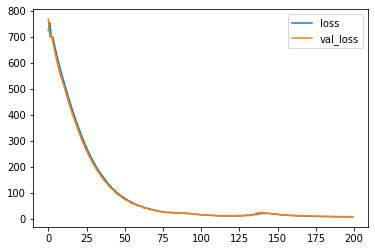

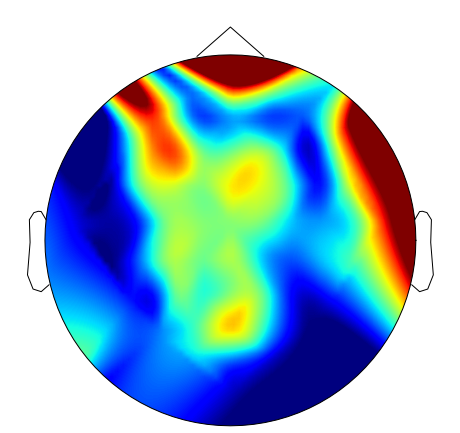

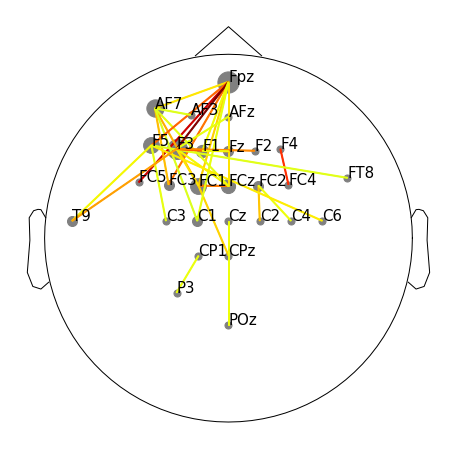

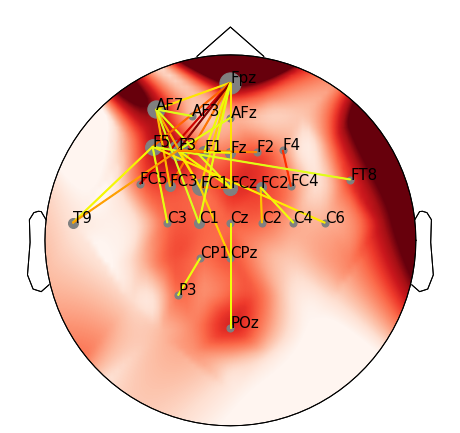

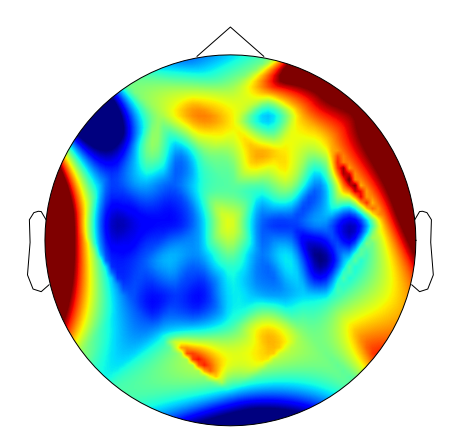

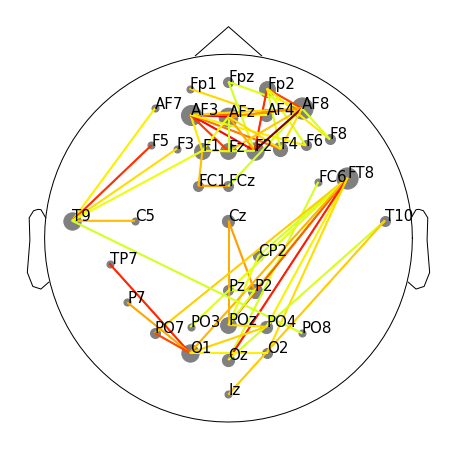

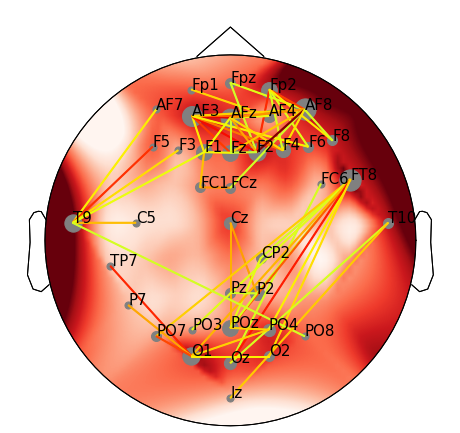

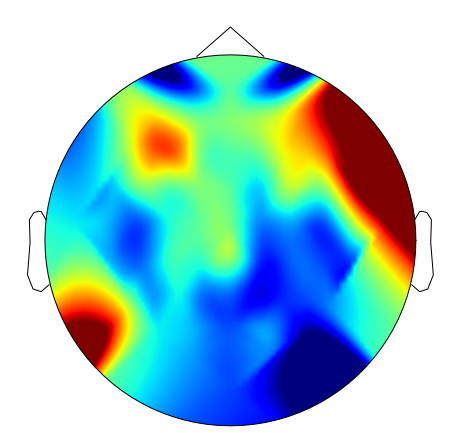

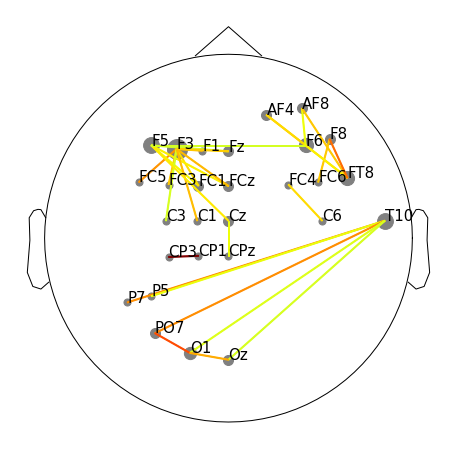

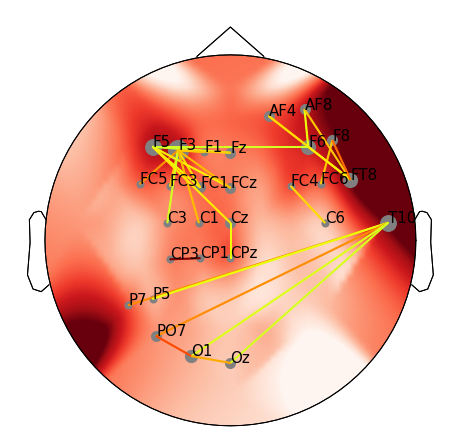

run:  2
Epoch 1/200
1/1 [==============================] - 1s 990ms/step - loss: 7.1466 - val_loss: 8.1436
Epoch 2/200
1/1 [==============================] - 0s 87ms/step - loss: 7.1216 - val_loss: 8.1678
Epoch 3/200
1/1 [==============================] - 0s 82ms/step - loss: 6.9372 - val_loss: 8.2067
Epoch 4/200
1/1 [==============================] - 0s 84ms/step - loss: 7.2040 - val_loss: 8.1552
Epoch 5/200
1/1 [==============================] - 0s 214ms/step - loss: 7.0603 - val_loss: 8.2524
Epoch 6/200
1/1 [==============================] - 0s 79ms/step - loss: 7.0927 - val_loss: 8.1611
Epoch 7/200
1/1 [==============================] - 0s 80ms/step - loss: 7.0882 - val_loss: 8.1937
Epoch 8/200
1/1 [==============================] - 0s 80ms/step - loss: 6.9096 - val_loss: 8.1772
Epoch 9/200
1/1 [==============================] - 0s 79ms/step - loss: 6.9010 - val_loss: 8.1017
Epoch 10/200
1/1 [==============================] - 0s 80ms/step - loss: 6.8944 - val_loss: 8.0237
Epoch 11/

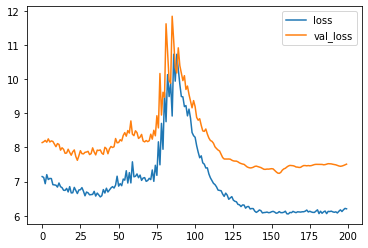

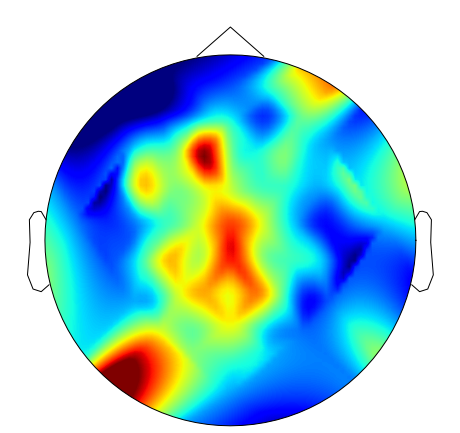

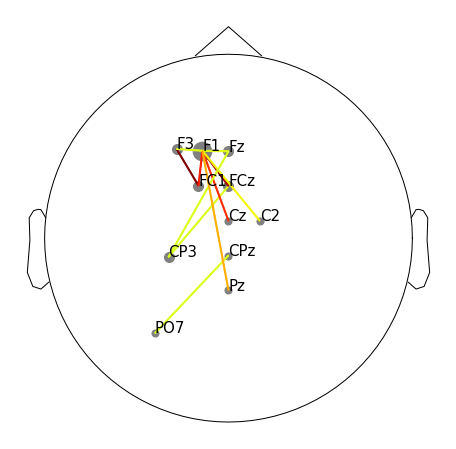

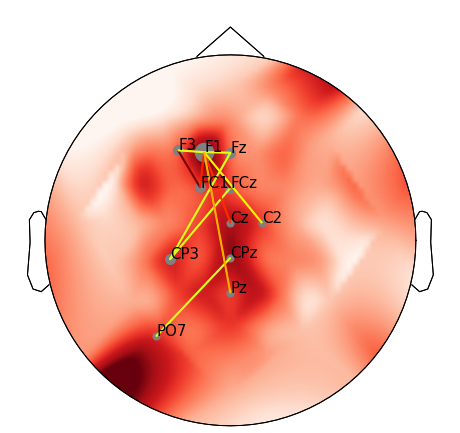

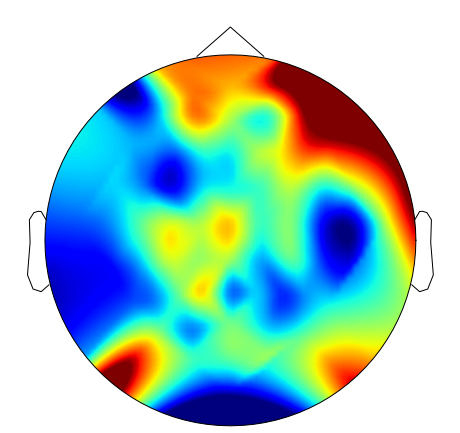

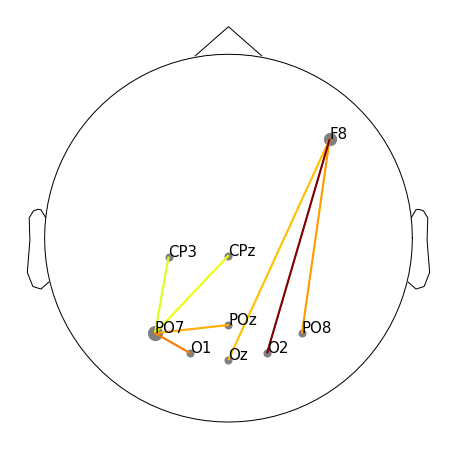

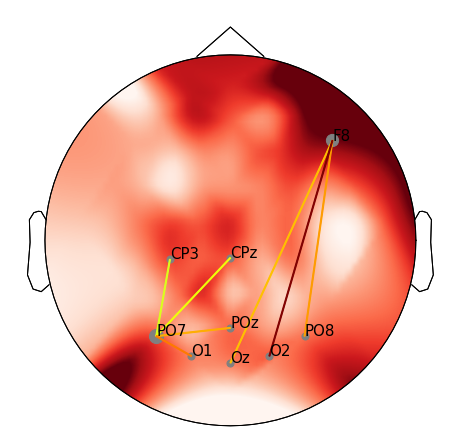

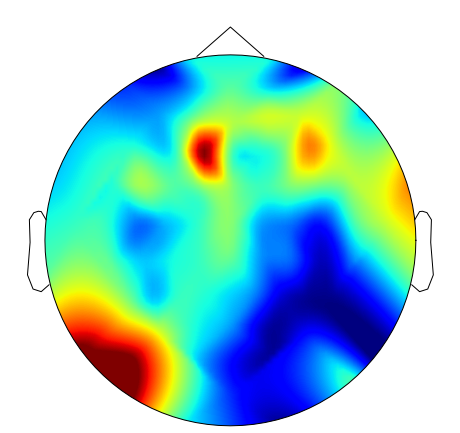

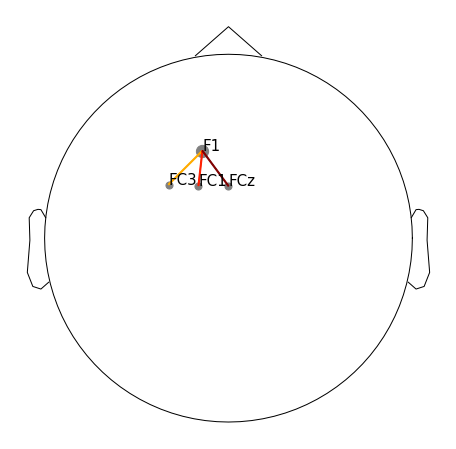

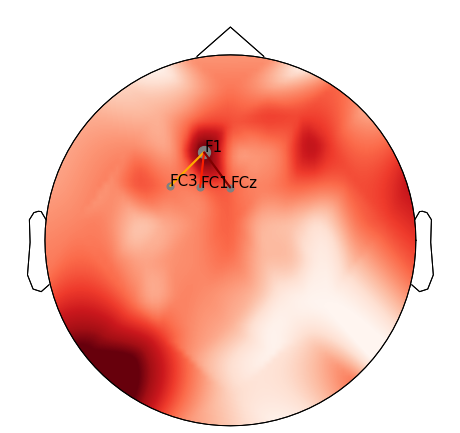

run:  3
Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 6.2613 - val_loss: 7.6175
Epoch 2/200
1/1 [==============================] - 0s 83ms/step - loss: 6.1887 - val_loss: 7.6344
Epoch 3/200
1/1 [==============================] - 0s 81ms/step - loss: 6.1756 - val_loss: 7.6374
Epoch 4/200
1/1 [==============================] - 0s 80ms/step - loss: 6.1035 - val_loss: 7.6569
Epoch 5/200
1/1 [==============================] - 0s 80ms/step - loss: 6.1550 - val_loss: 7.6568
Epoch 6/200
1/1 [==============================] - 0s 78ms/step - loss: 6.1887 - val_loss: 7.6335
Epoch 7/200
1/1 [==============================] - 0s 80ms/step - loss: 6.1461 - val_loss: 7.6345
Epoch 8/200
1/1 [==============================] - 0s 79ms/step - loss: 6.1435 - val_loss: 7.6411
Epoch 9/200
1/1 [==============================] - 0s 79ms/step - loss: 6.2400 - val_loss: 7.6413
Epoch 10/200
1/1 [==============================] - 0s 79ms/step - loss: 6.1549 - val_loss: 7.6549
Epoch 11/200


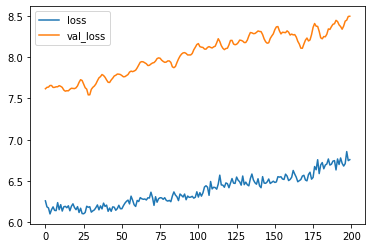

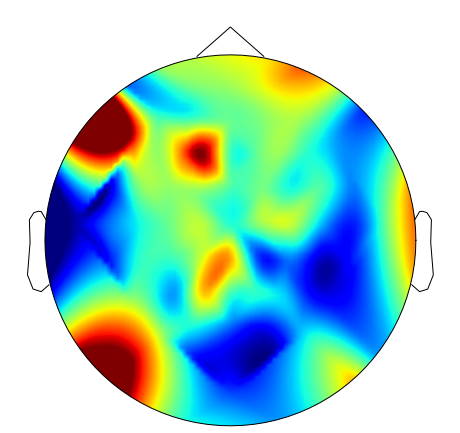

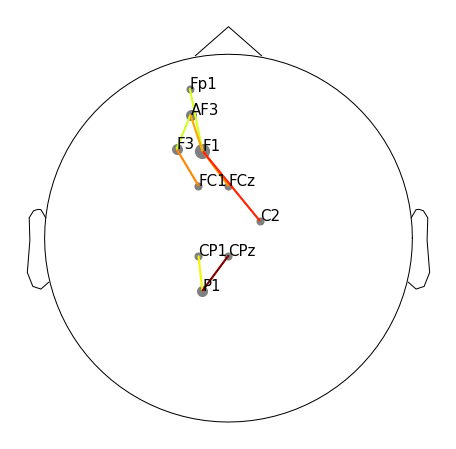

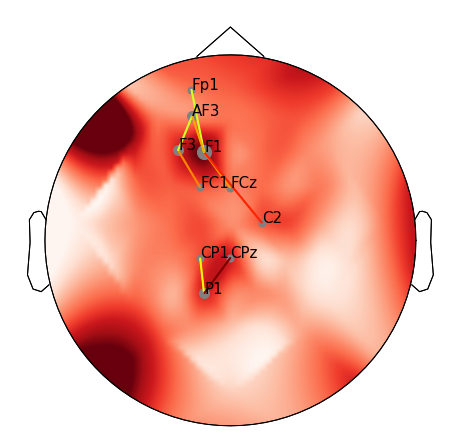

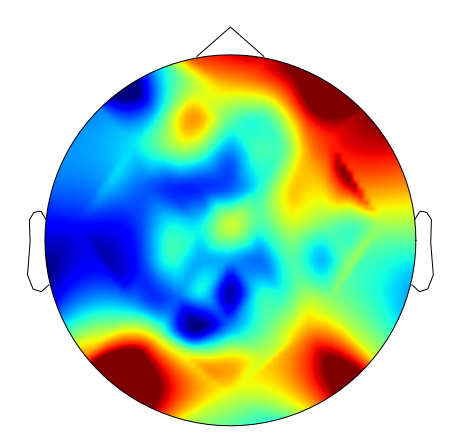

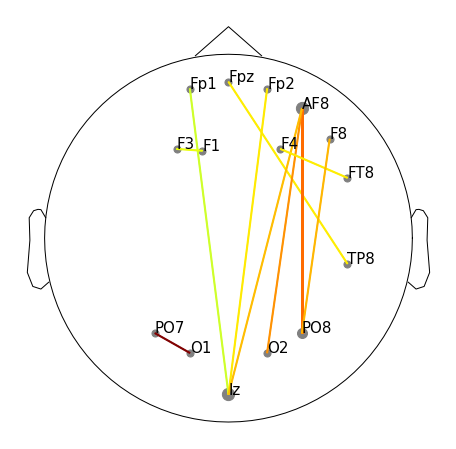

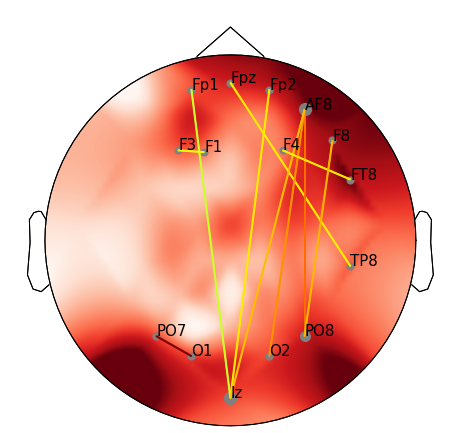

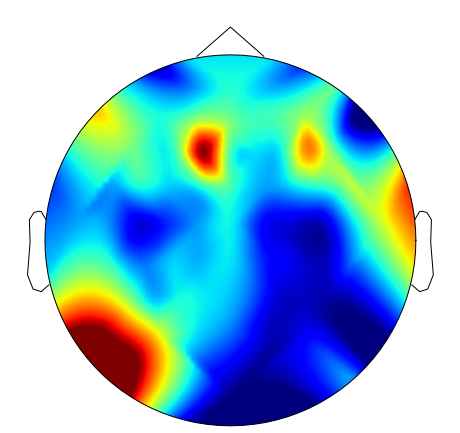

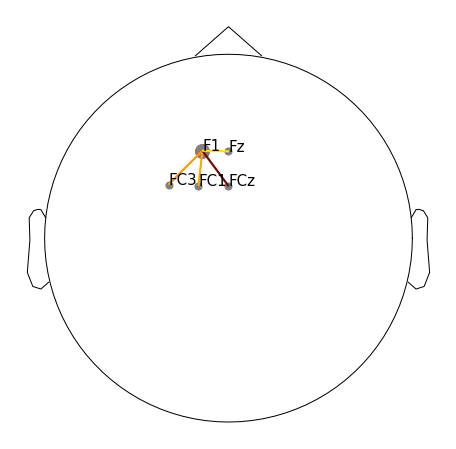

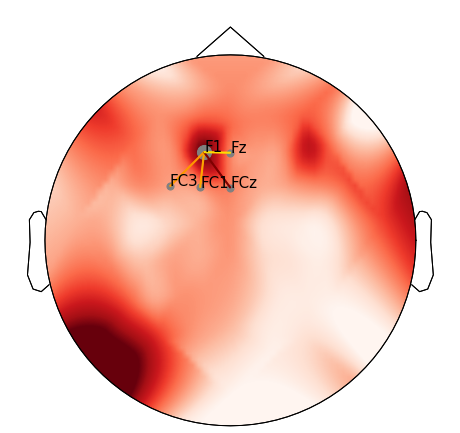

grupos:  [0, None, None]
run:  1
Epoch 1/200
2/2 [==============================] - 1s 248ms/step - loss: 724.2283 - val_loss: 715.9449
Epoch 2/200
2/2 [==============================] - 0s 82ms/step - loss: 699.8950 - val_loss: 630.2664
Epoch 3/200
2/2 [==============================] - 0s 79ms/step - loss: 629.8718 - val_loss: 587.8474
Epoch 4/200
2/2 [==============================] - 0s 76ms/step - loss: 582.9220 - val_loss: 539.4557
Epoch 5/200
2/2 [==============================] - 0s 75ms/step - loss: 537.1057 - val_loss: 497.3625
Epoch 6/200
2/2 [==============================] - 0s 212ms/step - loss: 494.8605 - val_loss: 456.4928
Epoch 7/200
2/2 [==============================] - 0s 78ms/step - loss: 452.4301 - val_loss: 417.3037
Epoch 8/200
2/2 [==============================] - 0s 80ms/step - loss: 413.1196 - val_loss: 379.0841
Epoch 9/200
2/2 [==============================] - 0s 78ms/step - loss: 375.4589 - val_loss: 343.7113
Epoch 10/200
2/2 [=============================

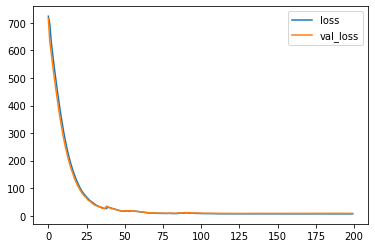

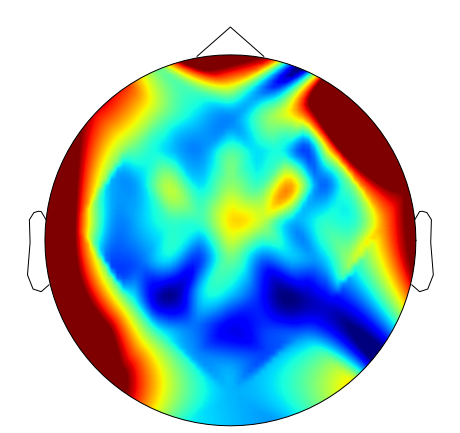

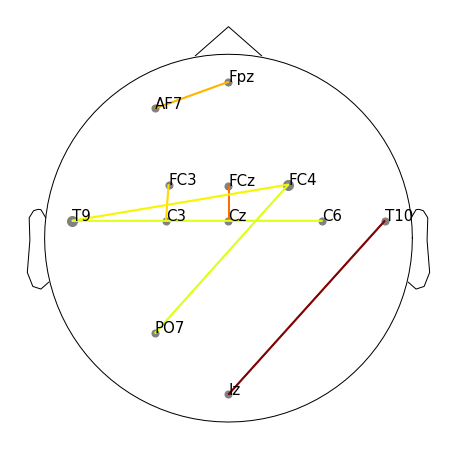

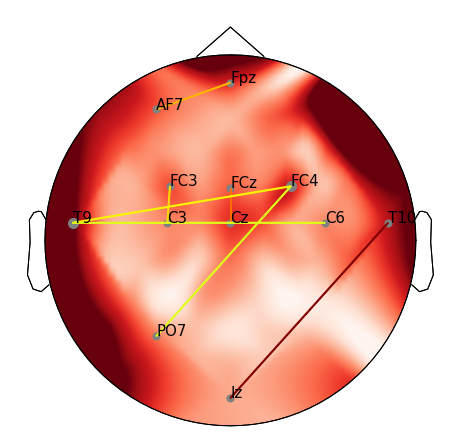

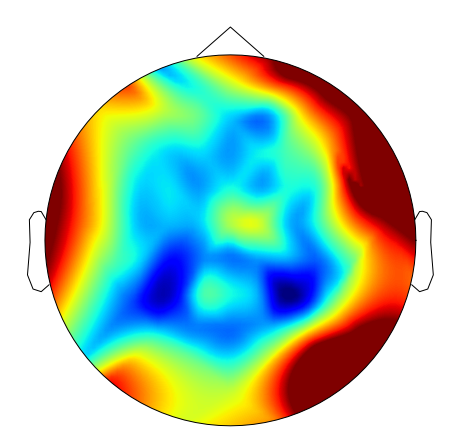

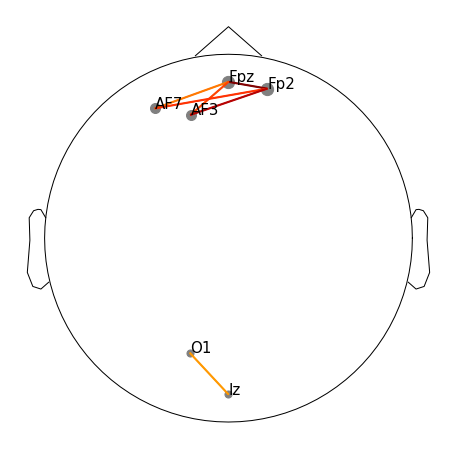

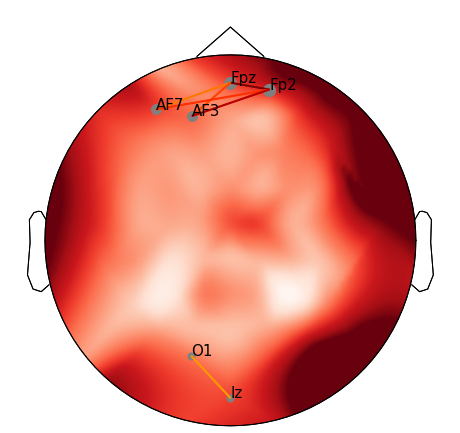

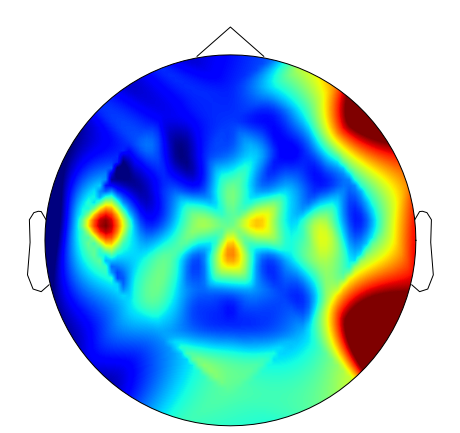

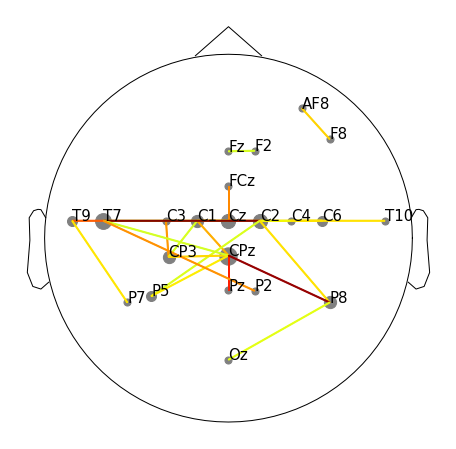

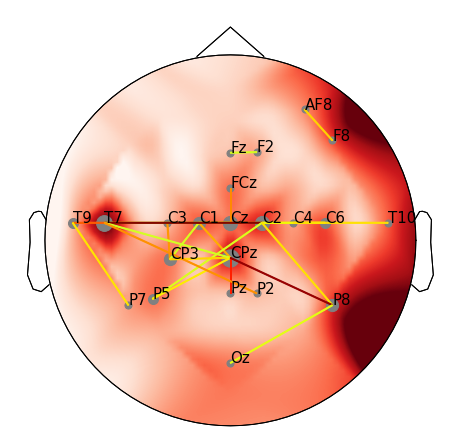

run:  2
Epoch 1/200
2/2 [==============================] - 1s 242ms/step - loss: 6.7327 - val_loss: 8.4651
Epoch 2/200
2/2 [==============================] - 0s 81ms/step - loss: 6.6857 - val_loss: 8.4159
Epoch 3/200
2/2 [==============================] - 0s 82ms/step - loss: 6.5792 - val_loss: 8.3724
Epoch 4/200
2/2 [==============================] - 0s 222ms/step - loss: 6.5680 - val_loss: 8.3228
Epoch 5/200
2/2 [==============================] - 0s 77ms/step - loss: 6.5933 - val_loss: 8.3675
Epoch 6/200
2/2 [==============================] - 0s 81ms/step - loss: 6.5848 - val_loss: 8.2390
Epoch 7/200
2/2 [==============================] - 0s 77ms/step - loss: 6.5857 - val_loss: 8.3475
Epoch 8/200
2/2 [==============================] - 0s 80ms/step - loss: 6.5763 - val_loss: 8.2431
Epoch 9/200
2/2 [==============================] - 0s 83ms/step - loss: 6.5271 - val_loss: 8.3079
Epoch 10/200
2/2 [==============================] - 0s 81ms/step - loss: 6.6336 - val_loss: 8.2998
Epoch 11/

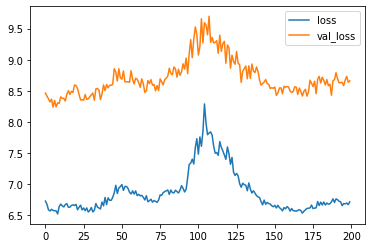

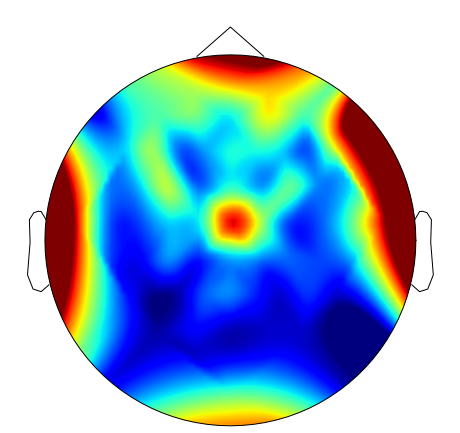

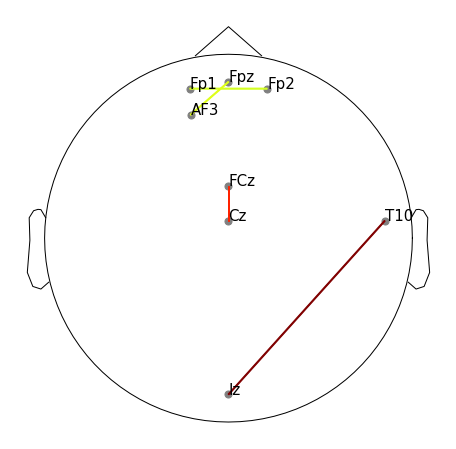

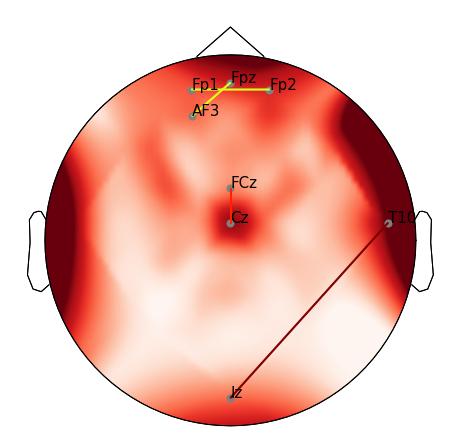

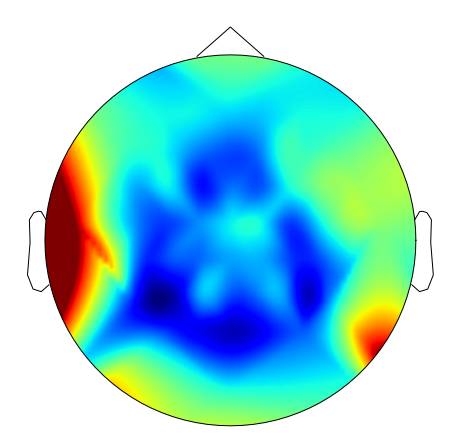

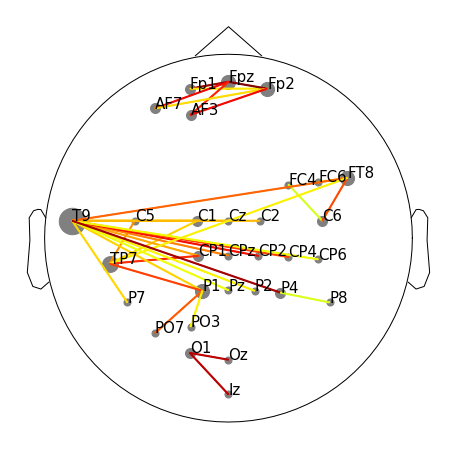

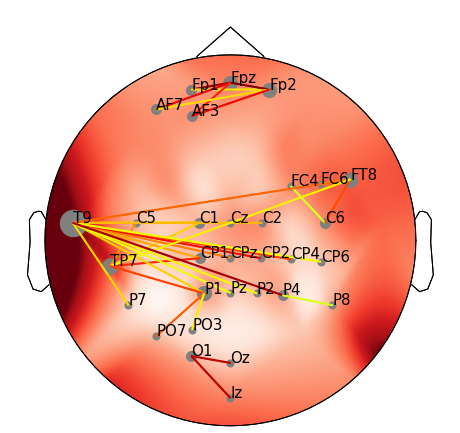

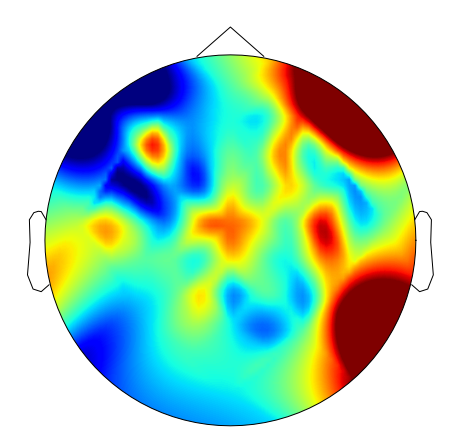

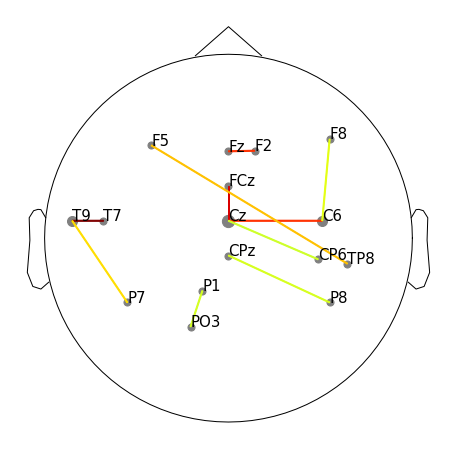

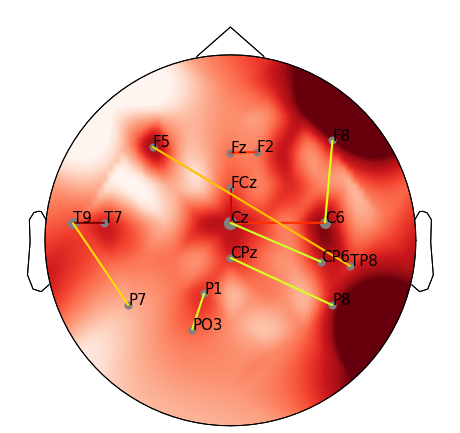

run:  3
Epoch 1/200
2/2 [==============================] - 1s 251ms/step - loss: 6.8287 - val_loss: 8.5296
Epoch 2/200
2/2 [==============================] - 0s 85ms/step - loss: 6.9144 - val_loss: 8.4857
Epoch 3/200
2/2 [==============================] - 0s 83ms/step - loss: 6.8502 - val_loss: 8.4857
Epoch 4/200
2/2 [==============================] - 0s 80ms/step - loss: 6.7966 - val_loss: 8.5386
Epoch 5/200
2/2 [==============================] - 0s 79ms/step - loss: 6.7978 - val_loss: 8.5044
Epoch 6/200
2/2 [==============================] - 0s 79ms/step - loss: 6.8128 - val_loss: 8.4824
Epoch 7/200
2/2 [==============================] - 0s 79ms/step - loss: 6.7411 - val_loss: 8.4730
Epoch 8/200
2/2 [==============================] - 0s 78ms/step - loss: 6.7645 - val_loss: 8.4008
Epoch 9/200
2/2 [==============================] - 0s 77ms/step - loss: 6.7708 - val_loss: 8.4936
Epoch 10/200
2/2 [==============================] - 0s 80ms/step - loss: 6.7433 - val_loss: 8.5166
Epoch 11/2

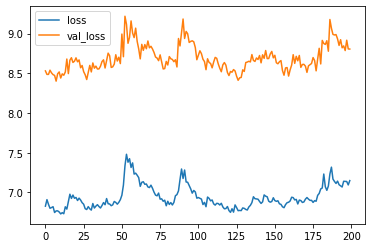

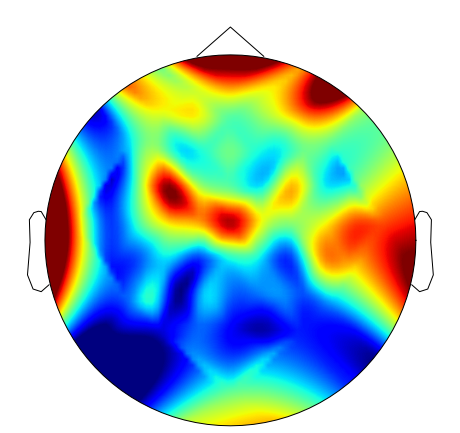

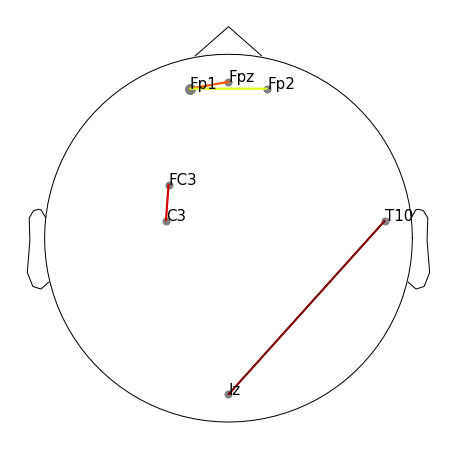

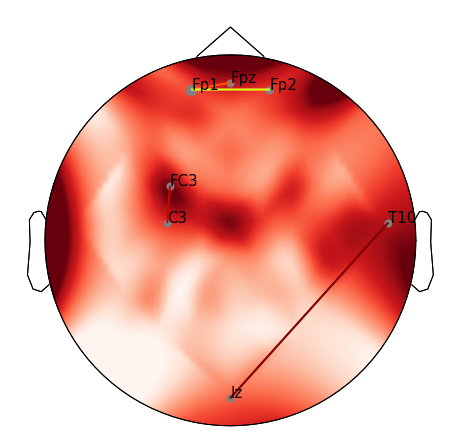

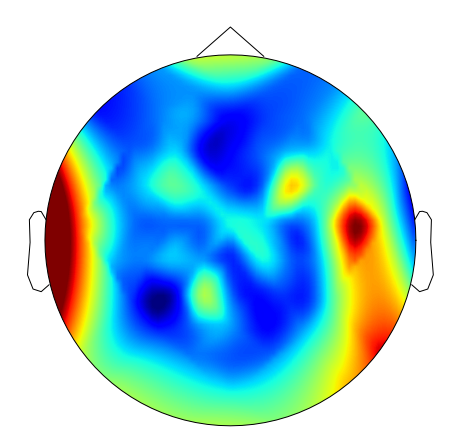

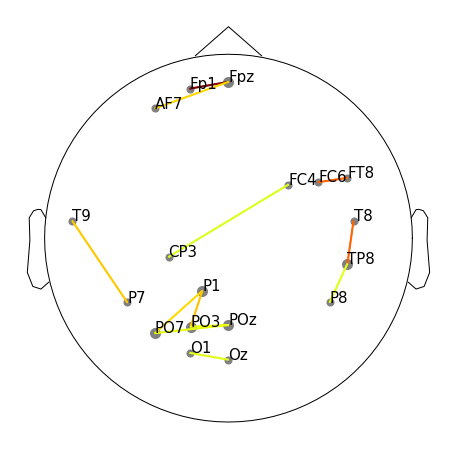

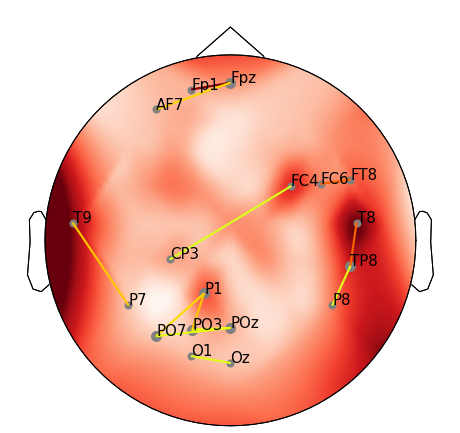

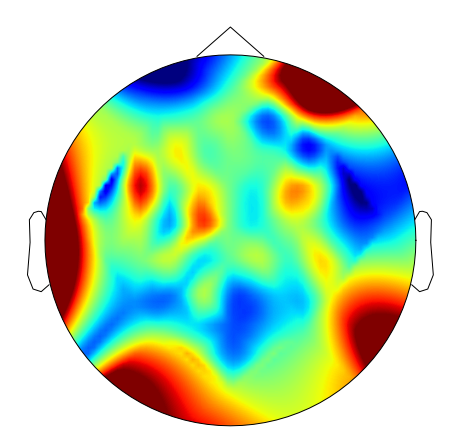

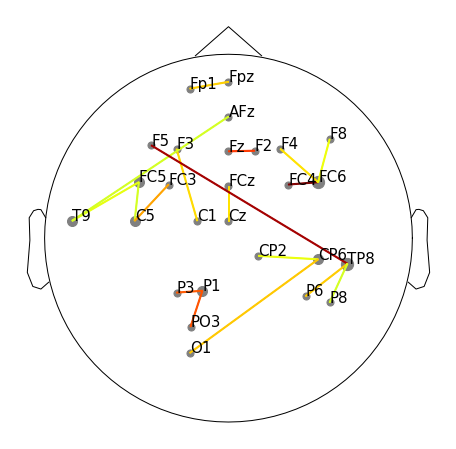

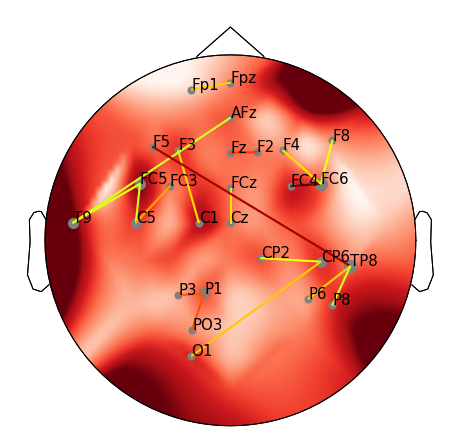

grupos:  [1, None, None]
run:  1
Epoch 1/200
2/2 [==============================] - 1s 290ms/step - loss: 727.1754 - val_loss: 700.1243
Epoch 2/200
2/2 [==============================] - 0s 90ms/step - loss: 709.0835 - val_loss: 659.8530
Epoch 3/200
2/2 [==============================] - 0s 91ms/step - loss: 661.8063 - val_loss: 609.3672
Epoch 4/200
2/2 [==============================] - 0s 84ms/step - loss: 607.5345 - val_loss: 571.8737
Epoch 5/200
2/2 [==============================] - 0s 98ms/step - loss: 567.9025 - val_loss: 531.8380
Epoch 6/200
2/2 [==============================] - 0s 79ms/step - loss: 529.1524 - val_loss: 494.1921
Epoch 7/200
2/2 [==============================] - 0s 93ms/step - loss: 492.1479 - val_loss: 459.0453
Epoch 8/200
2/2 [==============================] - 0s 231ms/step - loss: 455.7053 - val_loss: 425.8690
Epoch 9/200
2/2 [==============================] - 0s 88ms/step - loss: 421.3268 - val_loss: 392.7806
Epoch 10/200
2/2 [=============================

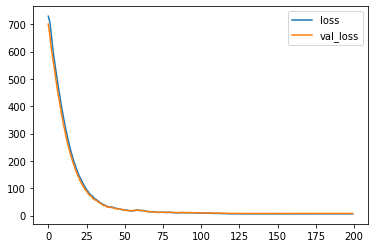

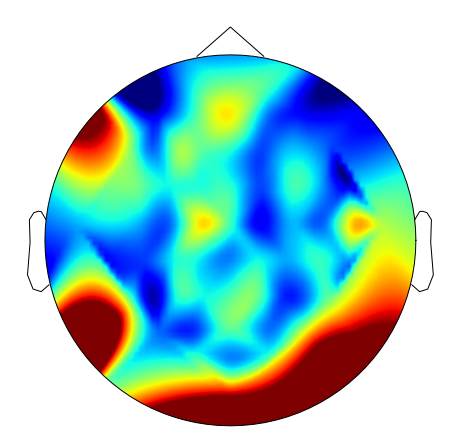

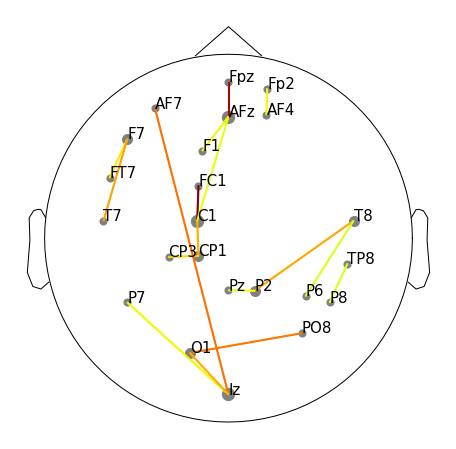

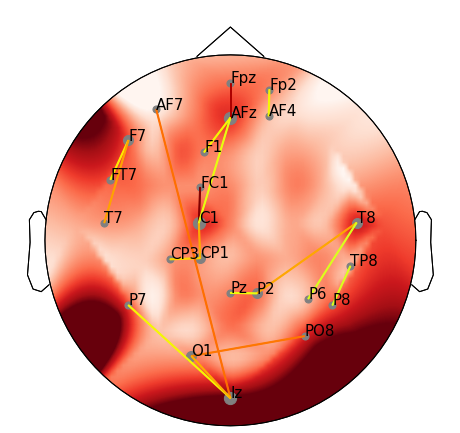

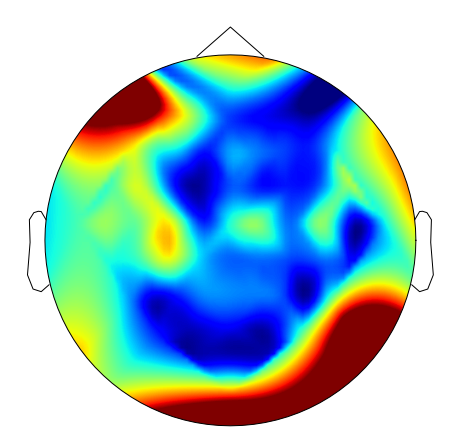

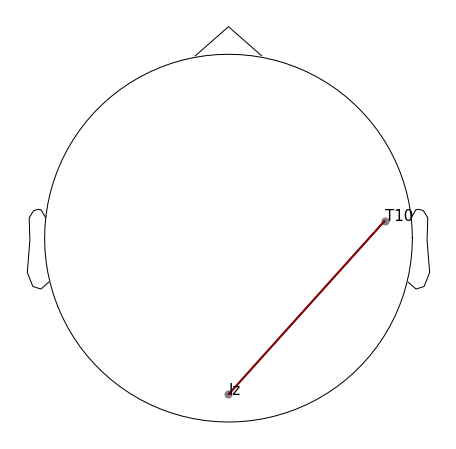

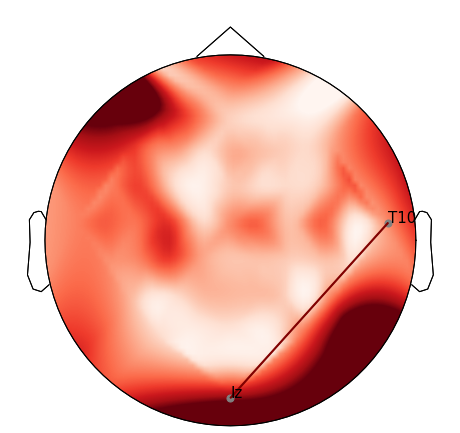

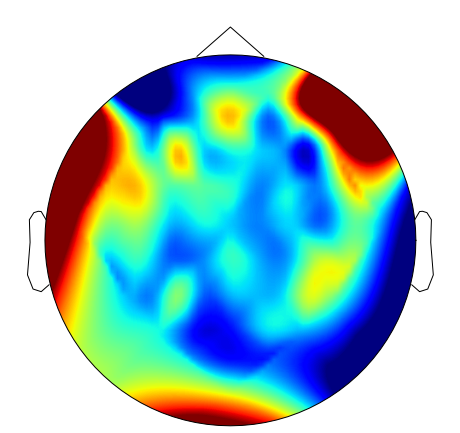

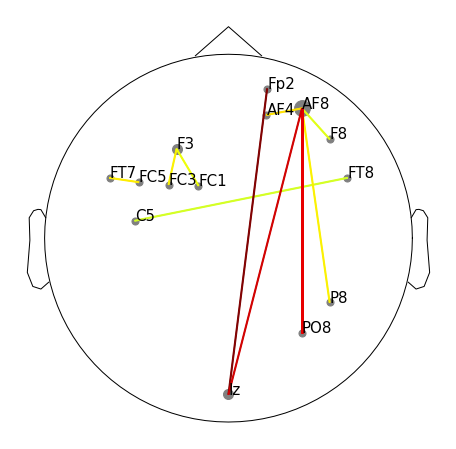

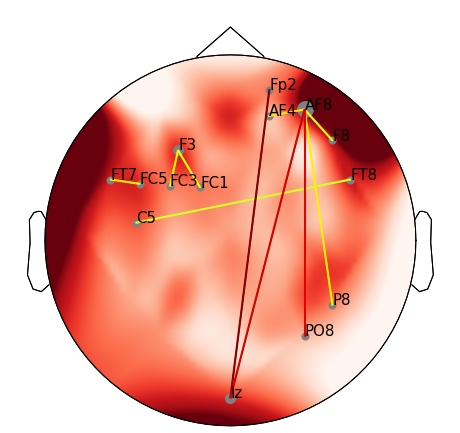

run:  2
Epoch 1/200
2/2 [==============================] - 1s 278ms/step - loss: 6.7891 - val_loss: 7.7992
Epoch 2/200
2/2 [==============================] - 0s 95ms/step - loss: 6.7270 - val_loss: 7.9298
Epoch 3/200
2/2 [==============================] - 0s 88ms/step - loss: 6.6491 - val_loss: 8.0849
Epoch 4/200
2/2 [==============================] - 0s 78ms/step - loss: 6.6905 - val_loss: 8.0796
Epoch 5/200
2/2 [==============================] - 0s 93ms/step - loss: 6.6483 - val_loss: 8.0234
Epoch 6/200
2/2 [==============================] - 0s 81ms/step - loss: 6.6425 - val_loss: 8.0568
Epoch 7/200
2/2 [==============================] - 0s 277ms/step - loss: 6.5626 - val_loss: 8.1152
Epoch 8/200
2/2 [==============================] - 0s 87ms/step - loss: 6.6147 - val_loss: 8.0396
Epoch 9/200
2/2 [==============================] - 0s 86ms/step - loss: 6.5633 - val_loss: 8.0068
Epoch 10/200
2/2 [==============================] - 0s 84ms/step - loss: 6.5504 - val_loss: 8.0722
Epoch 11/

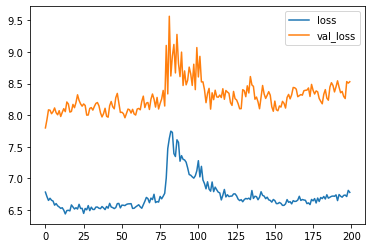

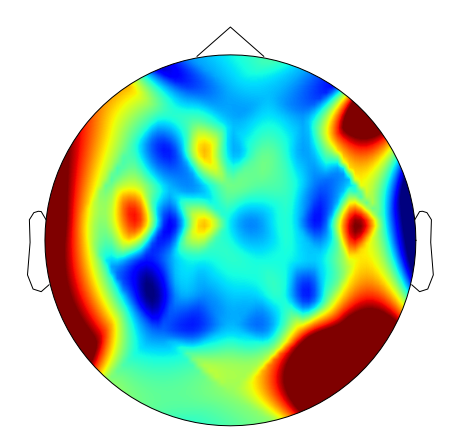

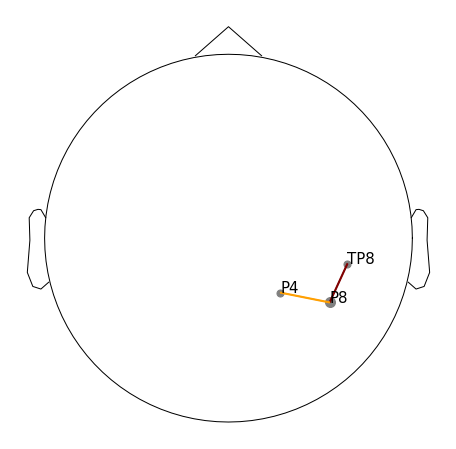

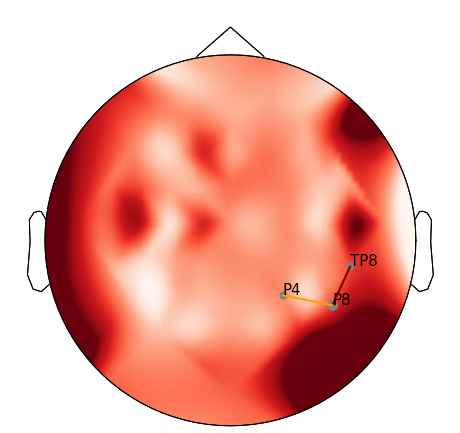

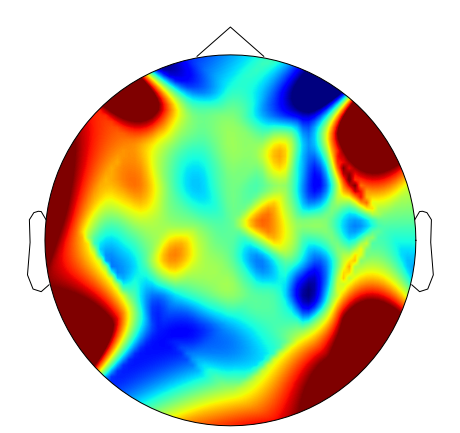

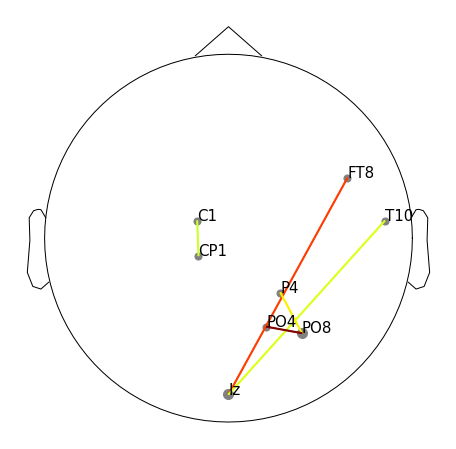

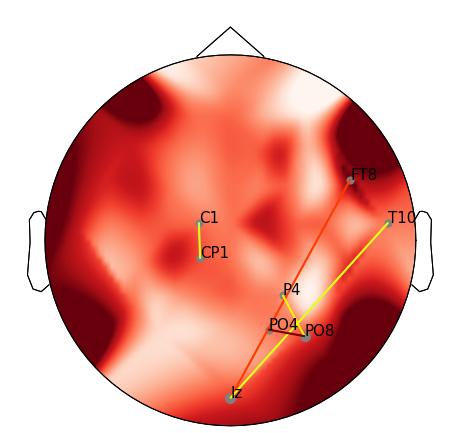

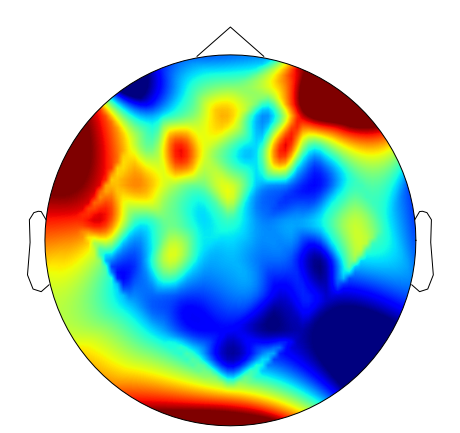

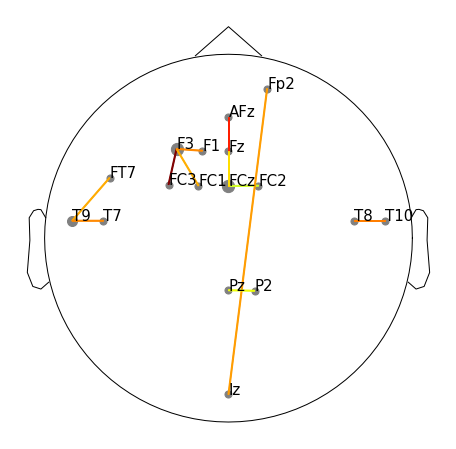

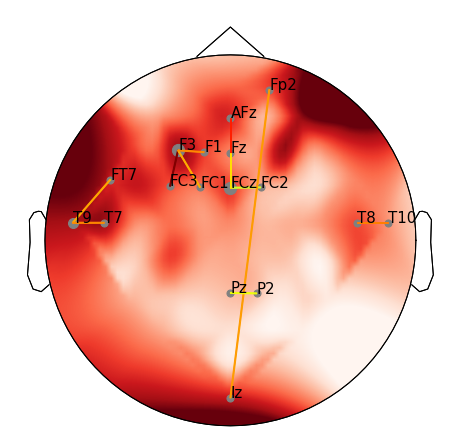

run:  3
Epoch 1/200
2/2 [==============================] - 1s 410ms/step - loss: 6.9332 - val_loss: 8.5061
Epoch 2/200
2/2 [==============================] - 0s 82ms/step - loss: 6.9612 - val_loss: 8.4047
Epoch 3/200
2/2 [==============================] - 0s 79ms/step - loss: 6.9072 - val_loss: 8.4230
Epoch 4/200
2/2 [==============================] - 0s 78ms/step - loss: 6.9361 - val_loss: 8.4307
Epoch 5/200
2/2 [==============================] - 0s 76ms/step - loss: 6.9369 - val_loss: 8.5102
Epoch 6/200
2/2 [==============================] - 0s 76ms/step - loss: 6.8983 - val_loss: 8.3838
Epoch 7/200
2/2 [==============================] - 0s 78ms/step - loss: 6.9392 - val_loss: 8.4517
Epoch 8/200
2/2 [==============================] - 0s 77ms/step - loss: 6.9241 - val_loss: 8.4569
Epoch 9/200
2/2 [==============================] - 0s 81ms/step - loss: 6.8906 - val_loss: 8.4538
Epoch 10/200
2/2 [==============================] - 0s 78ms/step - loss: 6.8964 - val_loss: 8.3582
Epoch 11/2

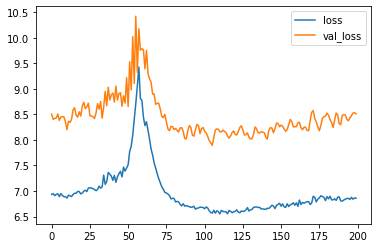

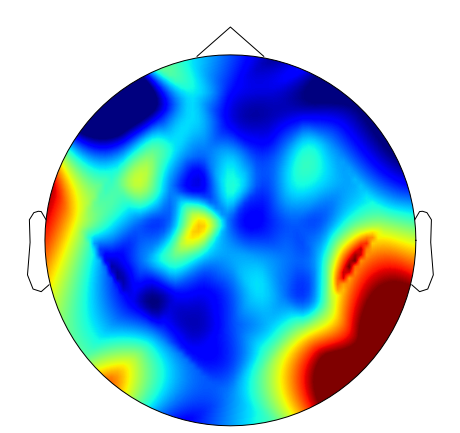

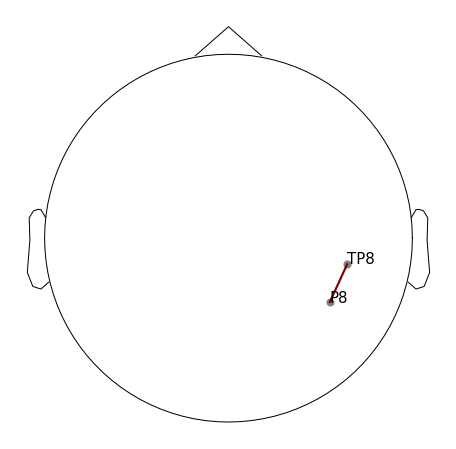

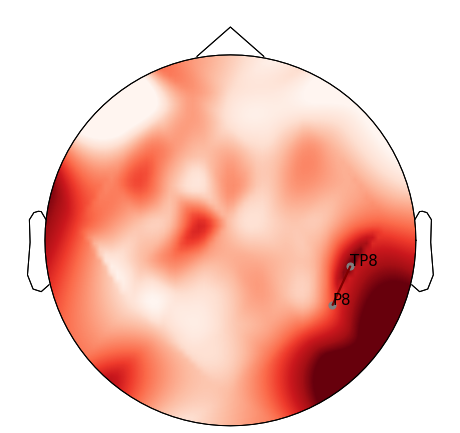

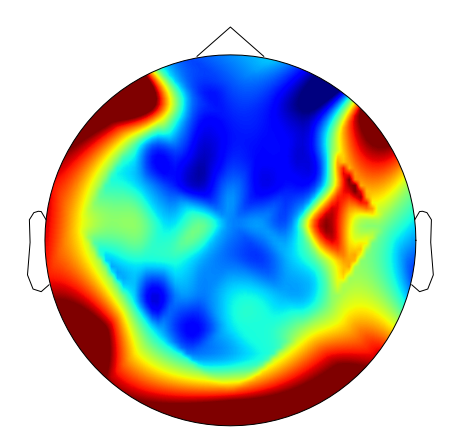

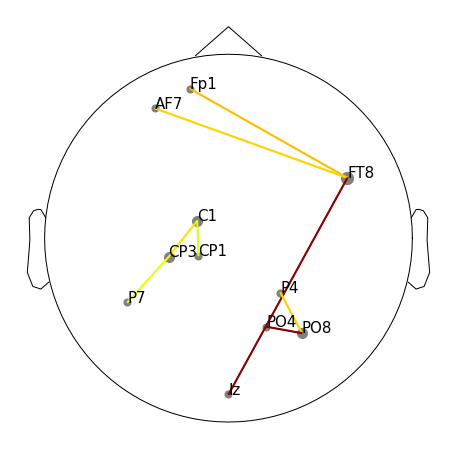

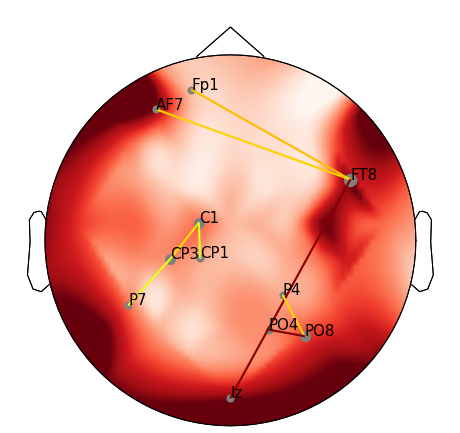

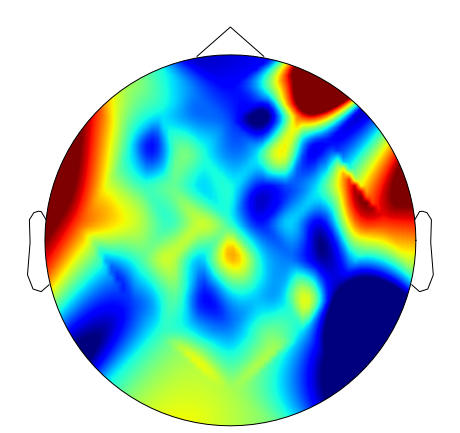

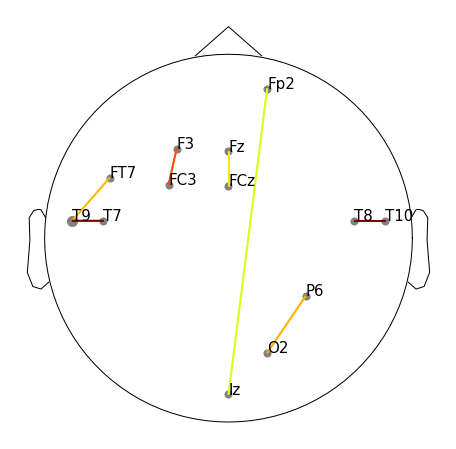

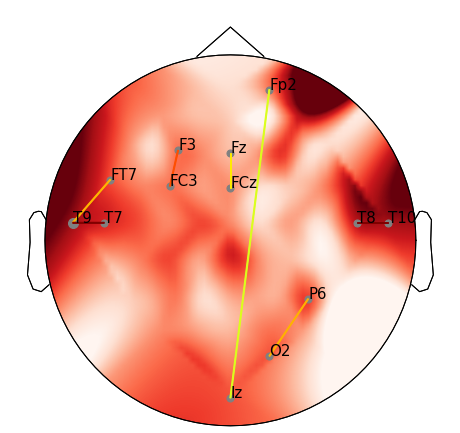

grupos:  [2, 1, 0]
run:  1
Epoch 1/200
3/3 [==============================] - 1s 168ms/step - loss: 724.2371 - val_loss: 658.3634
Epoch 2/200
3/3 [==============================] - 0s 66ms/step - loss: 645.4658 - val_loss: 586.0104
Epoch 3/200
3/3 [==============================] - 0s 59ms/step - loss: 571.8680 - val_loss: 516.2230
Epoch 4/200
3/3 [==============================] - 0s 62ms/step - loss: 503.6008 - val_loss: 451.8102
Epoch 5/200
3/3 [==============================] - 0s 68ms/step - loss: 438.9689 - val_loss: 391.1575
Epoch 6/200
3/3 [==============================] - 0s 66ms/step - loss: 380.0549 - val_loss: 337.5853
Epoch 7/200
3/3 [==============================] - 0s 64ms/step - loss: 327.2234 - val_loss: 289.9817
Epoch 8/200
3/3 [==============================] - 0s 67ms/step - loss: 280.6891 - val_loss: 248.1589
Epoch 9/200
3/3 [==============================] - 0s 62ms/step - loss: 240.1869 - val_loss: 213.2644
Epoch 10/200
3/3 [==============================] - 0s

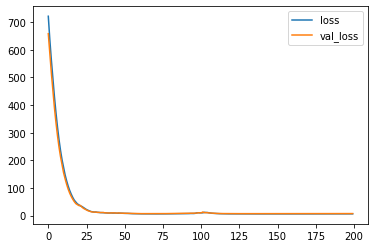

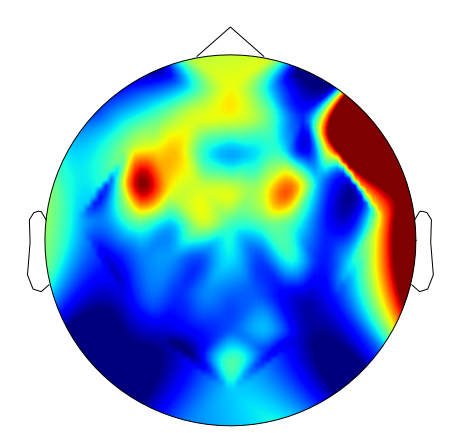

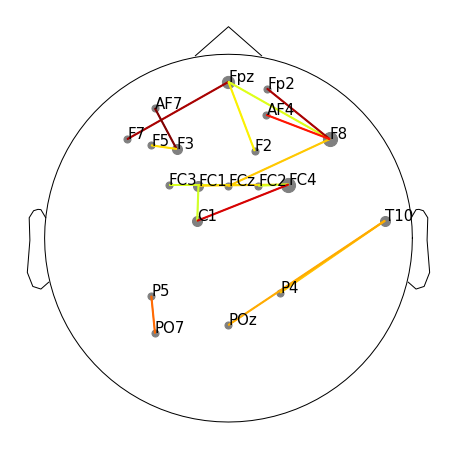

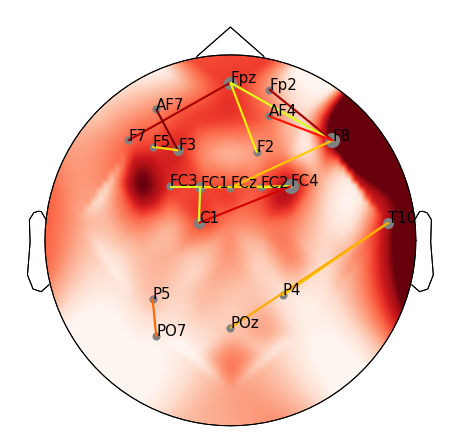

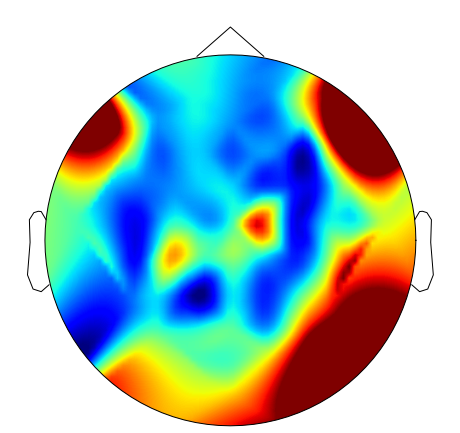

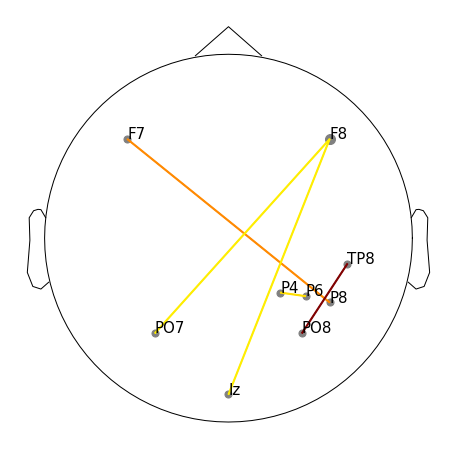

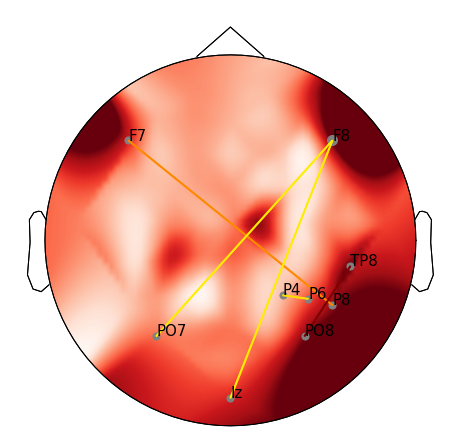

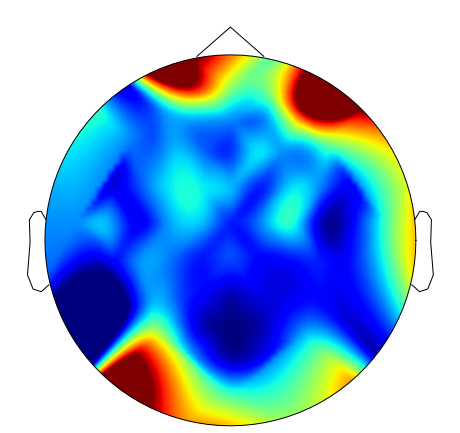

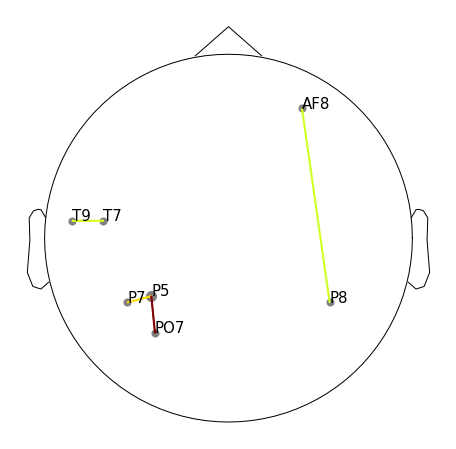

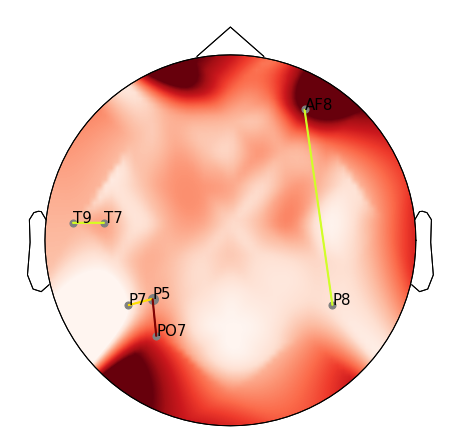

run:  2
Epoch 1/200
3/3 [==============================] - 1s 172ms/step - loss: 6.6686 - val_loss: 7.4666
Epoch 2/200
3/3 [==============================] - 0s 65ms/step - loss: 6.6223 - val_loss: 7.4374
Epoch 3/200
3/3 [==============================] - 0s 70ms/step - loss: 6.6183 - val_loss: 7.4801
Epoch 4/200
3/3 [==============================] - 0s 63ms/step - loss: 6.6293 - val_loss: 7.4797
Epoch 5/200
3/3 [==============================] - 0s 62ms/step - loss: 6.6361 - val_loss: 7.5176
Epoch 6/200
3/3 [==============================] - 0s 66ms/step - loss: 6.5793 - val_loss: 7.5556
Epoch 7/200
3/3 [==============================] - 0s 59ms/step - loss: 6.6520 - val_loss: 7.5473
Epoch 8/200
3/3 [==============================] - 0s 126ms/step - loss: 6.6139 - val_loss: 7.5659
Epoch 9/200
3/3 [==============================] - 0s 63ms/step - loss: 6.5643 - val_loss: 7.5819
Epoch 10/200
3/3 [==============================] - 0s 58ms/step - loss: 6.6294 - val_loss: 7.5773
Epoch 11/

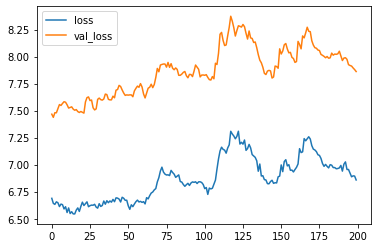

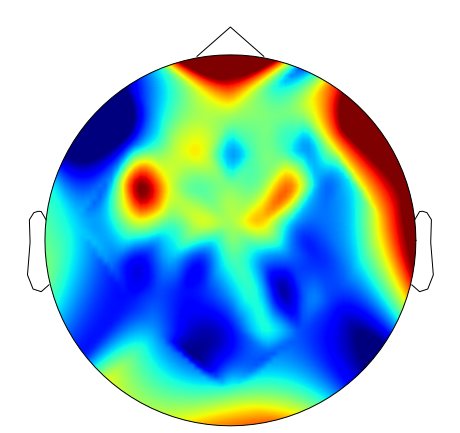

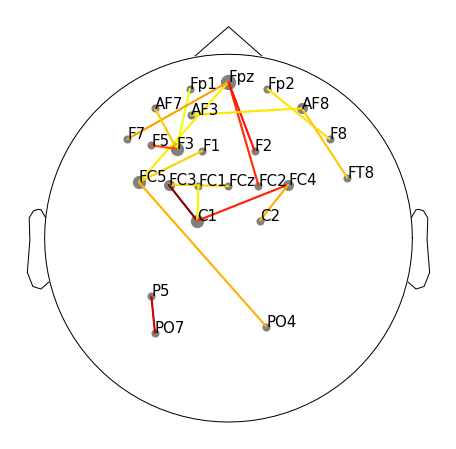

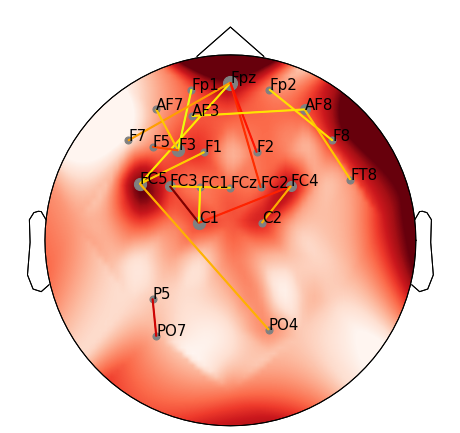

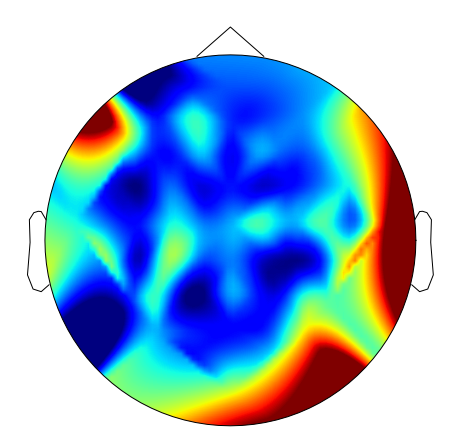

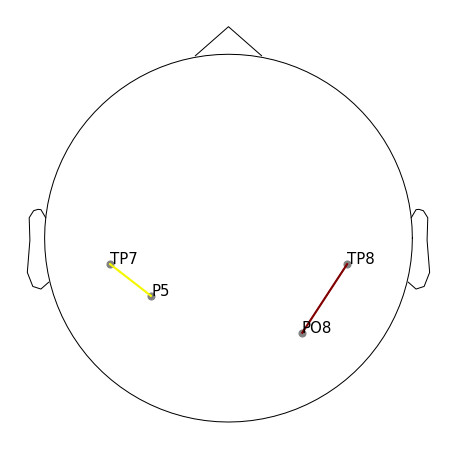

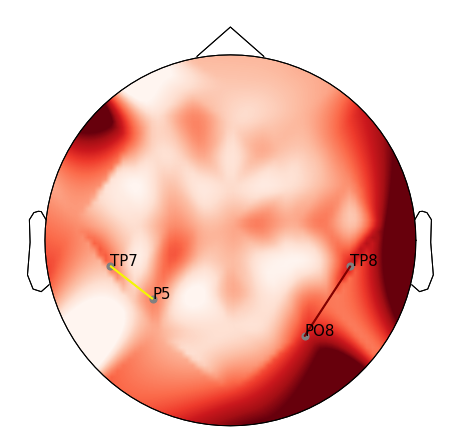

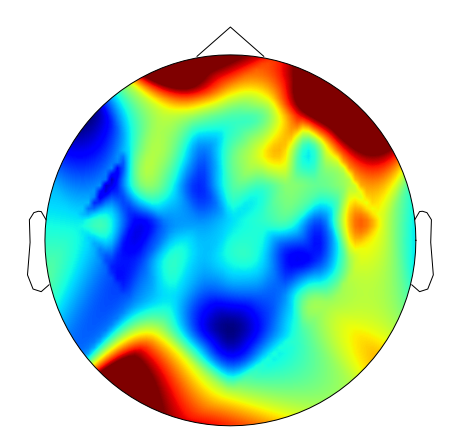

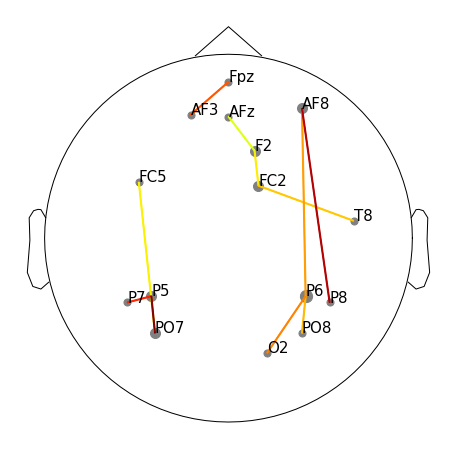

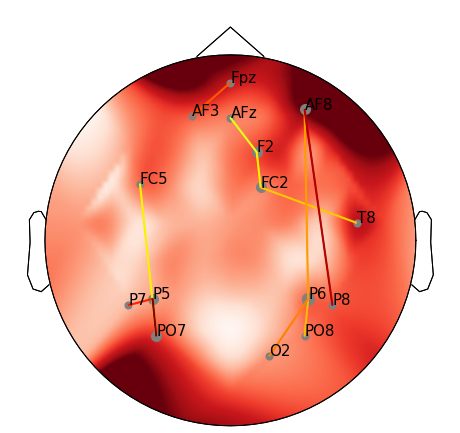

run:  3
Epoch 1/200
3/3 [==============================] - 1s 265ms/step - loss: 6.9999 - val_loss: 7.9244
Epoch 2/200
3/3 [==============================] - 0s 64ms/step - loss: 6.9678 - val_loss: 7.9460
Epoch 3/200
3/3 [==============================] - 0s 63ms/step - loss: 6.9681 - val_loss: 7.9692
Epoch 4/200
3/3 [==============================] - 0s 59ms/step - loss: 6.9954 - val_loss: 7.9473
Epoch 5/200
3/3 [==============================] - 0s 64ms/step - loss: 6.9898 - val_loss: 8.0314
Epoch 6/200
3/3 [==============================] - 0s 66ms/step - loss: 6.9751 - val_loss: 8.0278
Epoch 7/200
3/3 [==============================] - 0s 64ms/step - loss: 6.9741 - val_loss: 8.0214
Epoch 8/200
3/3 [==============================] - 0s 60ms/step - loss: 7.0098 - val_loss: 8.0228
Epoch 9/200
3/3 [==============================] - 0s 57ms/step - loss: 6.9896 - val_loss: 8.0418
Epoch 10/200
3/3 [==============================] - 0s 58ms/step - loss: 7.0901 - val_loss: 8.0522
Epoch 11/2

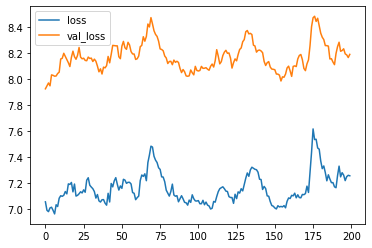

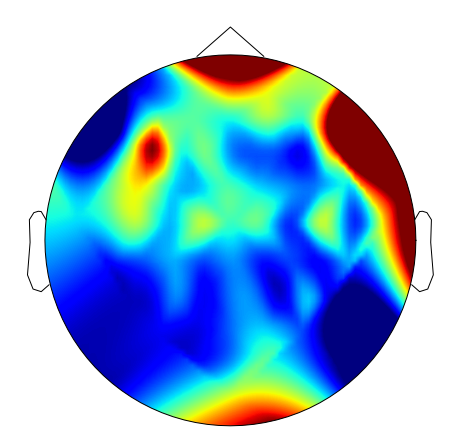

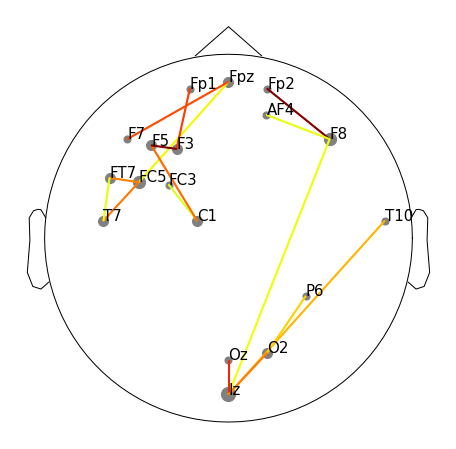

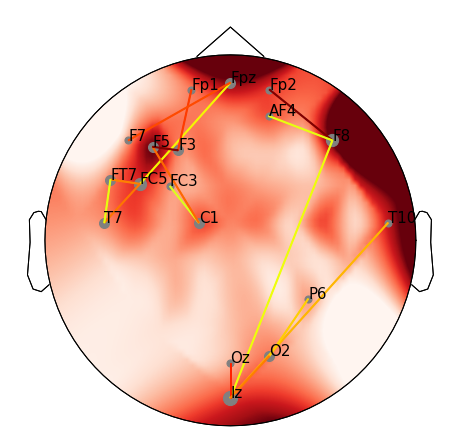

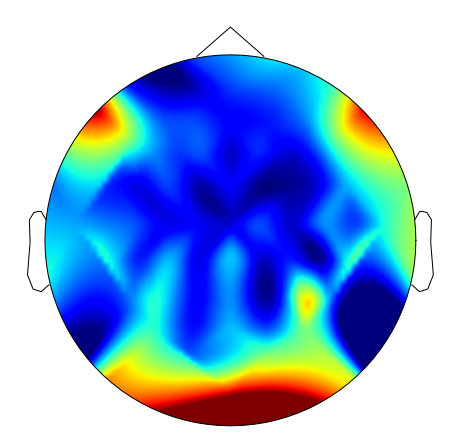

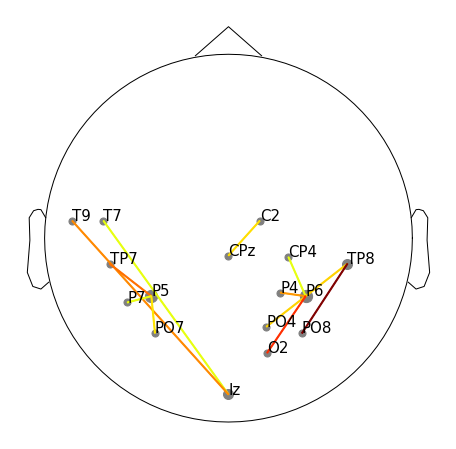

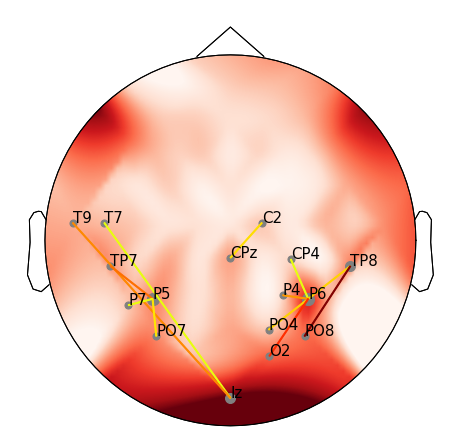

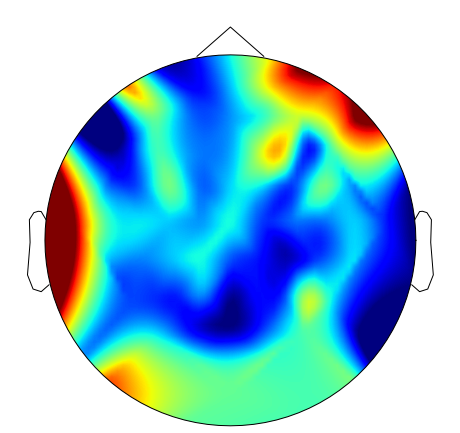

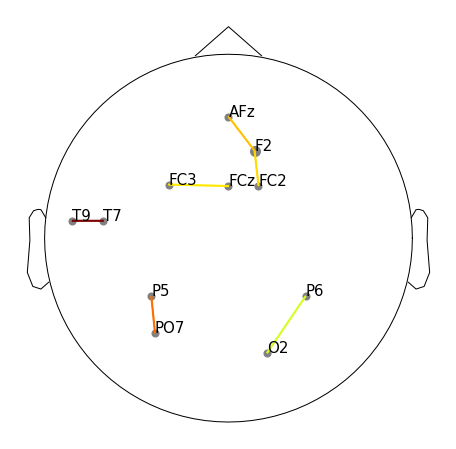

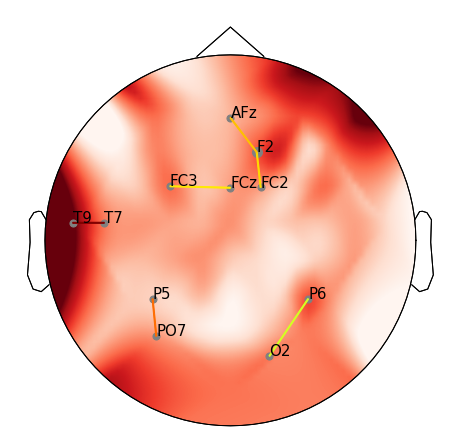

In [13]:
name_folder = 'R0_runs_vs_y_transfer'

tipos = np.asarray( [0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 2,
         1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 
         1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])#[2:buenos,1:regular,0:malos]
tipos = tipos[np.flip(np.argsort(meadesorden, axis=0),axis=0)].ravel()

clases =[[2,None, None], [0,None, None],[1,None, None],[2,1, 0]]

db = loaddb.PhysionetMMI('databases/PhysionetMMI')
channels_names = ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'] 

montage = mne.channels.read_montage(db.metadata['montage'])

groups_names = ['1','2','3','All']

path_models = Path_def+'/models/weigths/'

c = 0
for tipe in clases:
  print('grupos:  '+ str(tipe) )
  #seleccion de index por clase de sujetos
  idx= (tipos==tipe[0]) + (tipos==tipe[1]) + (tipos==tipe[2])
  #X = xtensor[idx,:,:]
  for r in range(3):
    print('run:  '+ str(r+1) )
    sc_ma = StandardScaler()
    y = sc_ma.fit_transform(target[idx].reshape(-1,1))

    xtensor = get_run(plv_conect,r+1)
    X = xtensor[idx,:,:]

    feats= SMRfeat()
    X_feat = feats.fit_transform(X)

    if r==0:
      initial_run = True
    else:
      initial_run = False

    net= MCSMRDNN_transfer(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False,path_in=path_models+'weigths_'+groups_names[c],path_out=path_models+'weigths_'+groups_names[c],run=r+1,initial_run=initial_run)
    predict_data = net.fit(X_feat , y)

    mdl = net.get_model()
    w = get_weigths(mdl,3)

    Model = {}
    Model["weigths"] = w
    Model["Ch_names"] = channels_names
    Model["montage"] = montage

    with open(Path_def+'models/'+name_folder+'/PLV_3f_MC_'+groups_names[c]+'_r'+str(r+1)+'.p','wb') as handle:
                    pickle.dump(Model,handle)

    plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/'+name_folder+'/G'+groups_names[c]+'/PLV_3f_MC_'+'_r'+str(r+1)+'_topo_t')
    plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/'+name_folder+'/G'+groups_names[c]+'/PLV_3f_MC_'+'_r'+str(r+1)+'_Cx_t')
    plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/'+name_folder+'/G'+groups_names[c]+'/PLV_3f_MC_'+'_r'+str(r+1)+'_All_t')

    plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/'+name_folder+'/G'+groups_names[c]+'/PLV_3f_MC_'+'_r'+str(r+1)+'_topo_u')
    plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/'+name_folder+'/G'+groups_names[c]+'/PLV_3f_MC_'+'_r'+str(r+1)+'_Cx_u')
    plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/'+name_folder+'/G'+groups_names[c]+'/PLV_3f_MC_'+'_r'+str(r+1)+'_All_u')

    plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/'+name_folder+'/G'+groups_names[c]+'/PLV_3f_MC_'+'_r'+str(r+1)+'_topo_B')
    plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/'+name_folder+'/G'+groups_names[c]+'/PLV_3f_MC_'+'_r'+str(r+1)+'_Cx_B')
    plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/'+name_folder+'/G'+groups_names[c]+'/PLV_3f_MC_'+'_r'+str(r+1)+'_All_B')
  c+=1